## 🎯 **Introduction**

In the task of **credit card fraud detection**, we deal with **imbalanced classification**, where fraudulent transactions are rare. For this reason, we selected a mix of **simple**, **ensemble**, and **boosting** models to compare their effectiveness:

| Model | Type | Goal |
|-------|------|------|
| **Logistic Regression** | Linear, baseline | Simple and interpretable benchmark |
| **Random Forest** | Ensemble, bagging | Robust against overfitting, works well on tabular data |
| **XGBoost** | Boosting | Highly accurate, handles imbalance well |
| **LightGBM** | Boosting (optimized) | Faster and scalable with large data |

---

## ⚙️ **Model Highlights & Training Details**

### ✅ **1. Logistic Regression**

- **Why**: Baseline model; good for understanding linear relationships.
- **Special Points**:
  - Interpretable coefficients (can explain why a decision was made).
  - Fast and simple.
- **How it trains**:
  - **No hidden layers**; just a single linear layer.
  - Uses **sigmoid function** to map outputs to probabilities.
  - Requires **standardization (scaling)** of numerical features.
- **Suitable for**: Quick baseline, high interpretability, small-scale use.

---

### 🌲 **2. Random Forest**

- **Why**: Strong model for tabular data with categorical and numerical features.
- **Special Points**:
  - Builds many **decision trees** and averages results.
  - Handles both numerical and categorical data directly.
- **How it trains**:
  - No "hidden layers" in the neural sense.
  - Trains many trees on **bootstrapped samples** of data (bagging).
  - Each tree splits based on feature importance using Gini/Entropy.
  - **Standardization not required**.
- **Suitable for**: Robustness, handling missing data and mixed types.

---

### 🚀 **3. XGBoost (Extreme Gradient Boosting)**

- **Why**: Among the top performers on structured datasets.
- **Special Points**:
  - Trains trees **sequentially**, where each new tree fixes errors from the last.
  - Uses **gradient descent** to optimize loss function.
  - Built-in handling of **missing values** and class imbalance.
- **How it trains**:
  - Series of shallow trees built to reduce error.
  - **No standardization required**.
  - Hyperparameters: `n_estimators`, `learning_rate`, `max_depth` control training.
- **Suitable for**: High accuracy, dealing with imbalance, Kaggle-style competitions.

---

### ⚡ **4. LightGBM (Light Gradient Boosting Machine)**

- **Why**: Similar to XGBoost, but faster and more memory-efficient.
- **Special Points**:
  - Uses **histogram-based** binning for speed.
  - Grows trees **leaf-wise** (with depth control) instead of level-wise → better accuracy.
- **How it trains**:
  - Optimized boosting algorithm for large-scale data.
  - Handles **categorical features natively**.
  - **No standardization needed**.
  - Like XGBoost, controlled via boosting parameters.
- **Suitable for**: Large datasets, production systems, extreme performance.



In [6]:
# Step 0: Imports
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Dataset downloaded to:", path)

# Step 2: Find and Load CSV
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found!")

df = pd.read_csv(csv_file)
print("Loaded data shape:", df.shape)

# Step 3: Data Preprocessing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Step 4: Find Min and Max Transaction Amount
min_amt = df['amt'].min()
max_amt = df['amt'].max()

print(f"Minimum Transaction Amount: ${min_amt:.2f}")
print(f"Maximum Transaction Amount: ${max_amt:.2f}")

Dataset downloaded to: /kaggle/input/fraud-detection
Loaded data shape: (555719, 23)
Minimum Transaction Amount: $1.00
Maximum Transaction Amount: $22768.11


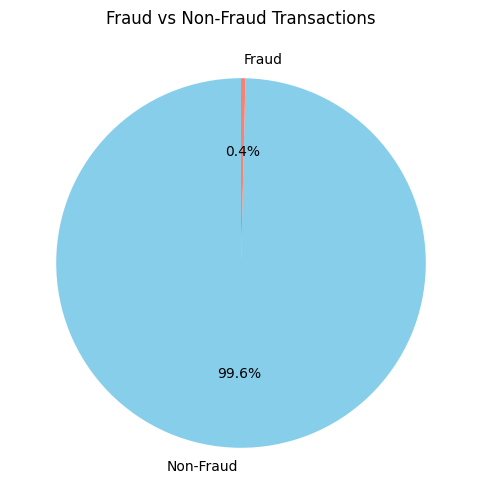

<ipython-input-2-cb95422dda38>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette='viridis')


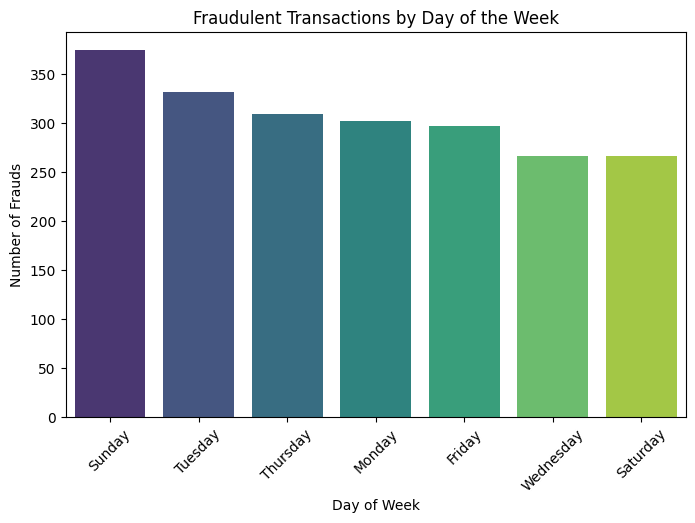

<ipython-input-2-cb95422dda38>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values, palette='pastel')


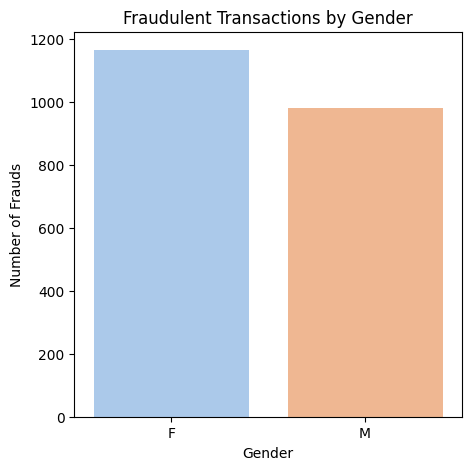

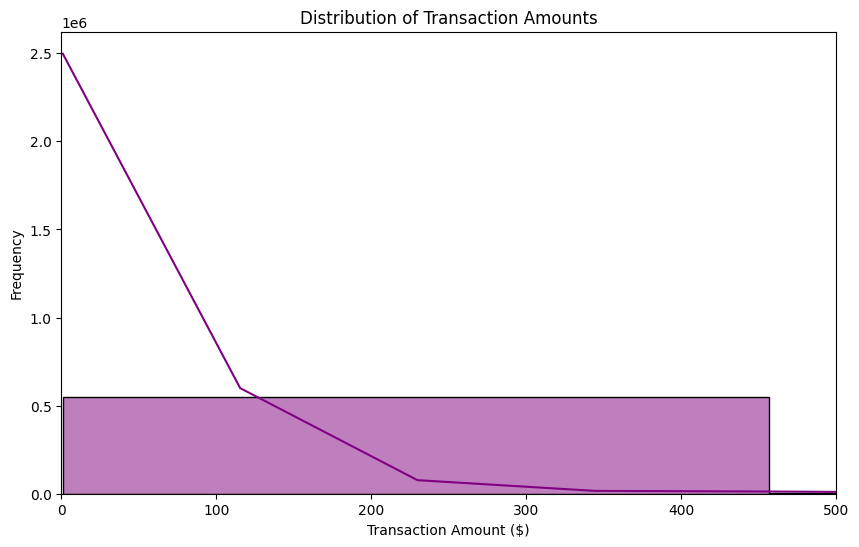

<ipython-input-2-cb95422dda38>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_fraud.index, y=top_states_fraud.values, palette='magma')


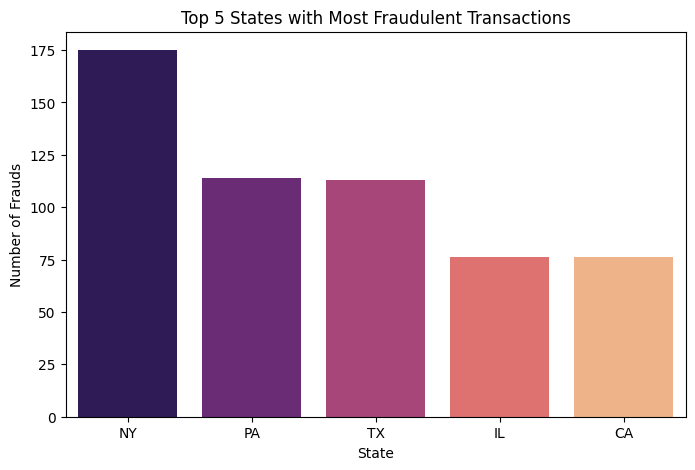

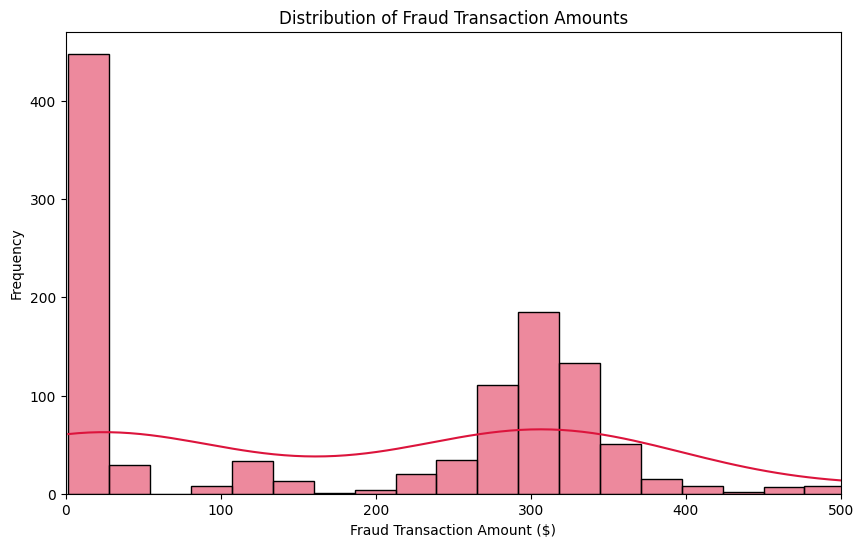

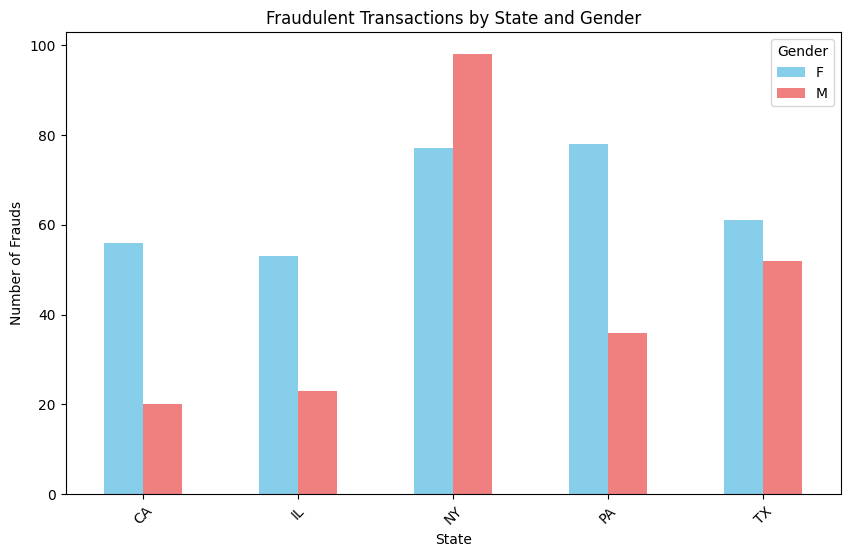

In [2]:


# Step 5: Pie Chart for Fraud vs Non-Fraud
fraud_counts = df['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# Step 6: Day of Week vs Fraud Counts
fraud_by_day = df[df['is_fraud'] == 1]['day_of_week'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Fraudulent Transactions by Day of the Week')
plt.ylabel('Number of Frauds')
plt.xlabel('Day of Week')
plt.show()

# Step 7: Gender vs Fraud Counts
fraud_by_gender = df[df['is_fraud'] == 1]['gender'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values, palette='pastel')
plt.title('Fraudulent Transactions by Gender')
plt.ylabel('Number of Frauds')
plt.xlabel('Gender')
plt.show()

# Step 8: Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True, color='purple')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Limit x-axis for better visibility
plt.show()


# Step 9: Top 5 States with Most Frauds
top_states_fraud = df[df['is_fraud'] == 1]['state'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_states_fraud.index, y=top_states_fraud.values, palette='magma')
plt.title('Top 5 States with Most Fraudulent Transactions')
plt.ylabel('Number of Frauds')
plt.xlabel('State')
plt.show()

# Step 10: Histogram of Fraud Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_fraud'] == 1]['amt'], bins=50, kde=True, color='crimson')
plt.title('Distribution of Fraud Transaction Amounts')
plt.xlabel('Fraud Transaction Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Adjust if you want to show higher values too
plt.show()

# Step 11: Fraud vs State (split by Gender)

# First, get Top 5 states with highest fraud
top5_states = df[df['is_fraud'] == 1]['state'].value_counts().head(5).index

# Filter fraud cases for only those top states
df_top5_fraud = df[(df['is_fraud'] == 1) & (df['state'].isin(top5_states))]

# Create a grouped count (State vs Gender)
state_gender_counts = df_top5_fraud.groupby(['state', 'gender']).size().unstack(fill_value=0)

# Plot
state_gender_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Fraudulent Transactions by State and Gender')
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [3]:
import pandas as pd

# Assuming df is your DataFrame

# Define important sets
high_amount_threshold = 1000  # Set threshold for 'high amount'

# ------------- Basic Probabilities ------------- #

# P(F) - Probability of fraud
P_F = df['is_fraud'].mean()

# P(~F) - Probability of not fraud
P_not_F = 1 - P_F

# P(M) and P(W)
P_M = (df['gender'] == 'M').mean()
P_W = (df['gender'] == 'F').mean()

# ------------- Joint Probabilities ------------- #

# P(F ∩ M) - Fraud and Male
P_F_and_M = ((df['is_fraud'] == 1) & (df['gender'] == 'M')).mean()

# P(F ∩ W) - Fraud and Female
P_F_and_W = ((df['is_fraud'] == 1) & (df['gender'] == 'F')).mean()

# ------------- Conditional Probabilities ------------- #

# P(F | M) - Fraud given Male
P_F_given_M = P_F_and_M / P_M if P_M > 0 else 0

# P(F | W) - Fraud given Female
P_F_given_W = P_F_and_W / P_W if P_W > 0 else 0

# ------------- State Based Probabilities (Top 1 State Example) ------------- #

# Find the most fraud-heavy state
top_fraud_state = df[df['is_fraud'] == 1]['state'].value_counts().idxmax()

# P(F ∩ S) - Fraud and State
P_F_and_S = ((df['is_fraud'] == 1) & (df['state'] == top_fraud_state)).mean()

# P(S) - Probability of that State
P_S = (df['state'] == top_fraud_state).mean()

# P(F | S) - Fraud given State
P_F_given_S = P_F_and_S / P_S if P_S > 0 else 0

# ------------- Category Based Probabilities (Top 1 Category Example) ------------- #

# Find most common merchant category
top_category = df['category'].value_counts().idxmax()

# P(F ∩ C) - Fraud and Category
P_F_and_C = ((df['is_fraud'] == 1) & (df['category'] == top_category)).mean()

# ------------- Amount Based Probabilities ------------- #

# High amount and low amount masks
high_amount = df['amt'] > high_amount_threshold
low_amount = df['amt'] <= high_amount_threshold

# P(H | F) - High amount given fraud
P_H_given_F = (high_amount & (df['is_fraud'] == 1)).sum() / (df['is_fraud'] == 1).sum()

# P(L | ~F) - Low amount given not fraud
P_L_given_not_F = (low_amount & (df['is_fraud'] == 0)).sum() / (df['is_fraud'] == 0).sum()

# P(F ∩ H) - Fraud and High amount
P_F_and_H = ((df['is_fraud'] == 1) & high_amount).mean()

# P(H) - Probability of High amount
P_H = high_amount.mean()

# P(F | H) - Fraud given High amount (Bayes)
P_F_given_H = P_F_and_H / P_H if P_H > 0 else 0

# ------------- Print Results ------------- #

print("\n--- Basic Probabilities ---")
print(f"P(Fraud) = {P_F:.4f}")
print(f"P(Not Fraud) = {P_not_F:.4f}")

print("\n--- Gender based Probabilities ---")
print(f"P(Fraud ∩ Male) = {P_F_and_M:.4f}")
print(f"P(Fraud ∩ Female) = {P_F_and_W:.4f}")
print(f"P(Fraud | Male) = {P_F_given_M:.4f}")
print(f"P(Fraud | Female) = {P_F_given_W:.4f}")

print("\n--- State based Probabilities (Top Fraud State: {top_fraud_state}) ---")
print(f"P(Fraud ∩ State={top_fraud_state}) = {P_F_and_S:.4f}")
print(f"P(Fraud | State={top_fraud_state}) = {P_F_given_S:.4f}")

print("\n--- Category based Probabilities (Top Category: {top_category}) ---")
print(f"P(Fraud ∩ Category={top_category}) = {P_F_and_C:.4f}")

print("\n--- Amount based Probabilities ---")
print(f"P(High Amount | Fraud) = {P_H_given_F:.4f}")
print(f"P(Low Amount | Not Fraud) = {P_L_given_not_F:.4f}")
print(f"P(Fraud ∩ High Amount) = {P_F_and_H:.4f}")
print(f"P(Fraud | High Amount) = {P_F_given_H:.4f}")



--- Basic Probabilities ---
P(Fraud) = 0.0039
P(Not Fraud) = 0.9961

--- Gender based Probabilities ---
P(Fraud ∩ Male) = 0.0018
P(Fraud ∩ Female) = 0.0021
P(Fraud | Male) = 0.0039
P(Fraud | Female) = 0.0038

--- State based Probabilities (Top Fraud State: {top_fraud_state}) ---
P(Fraud ∩ State=NY) = 0.0003
P(Fraud | State=NY) = 0.0049

--- Category based Probabilities (Top Category: {top_category}) ---
P(Fraud ∩ Category=gas_transport) = 0.0003

--- Amount based Probabilities ---
P(High Amount | Fraud) = 0.1287
P(Low Amount | Not Fraud) = 0.9976
P(Fraud ∩ High Amount) = 0.0005
P(Fraud | High Amount) = 0.1744


# Logistic Regression	✅	Simple, strong baseline

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    110715
           1       0.02      0.78      0.05       429

    accuracy                           0.87    111144
   macro avg       0.51      0.83      0.49    111144
weighted avg       1.00      0.87      0.93    111144

ROC AUC Score: 0.8916


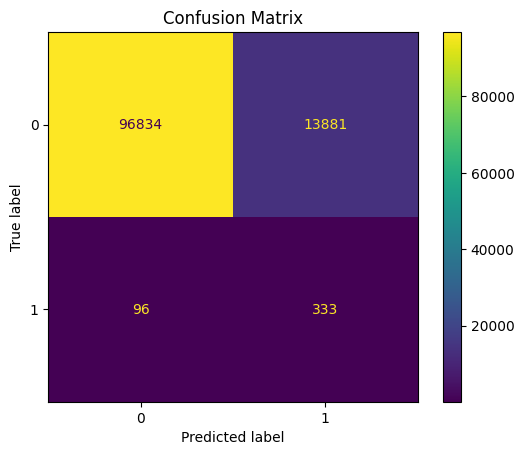


Top Influential Features:
                                           Feature  Coefficient
741                                      state_WV   -12.386990
738                                      state_VT    -7.467396
736                                      state_UT    -6.968387
376    merchant_fraud_Larson, Quitzon and Spencer     4.716728
394               merchant_fraud_Little-Gleichner     4.512771
336                    merchant_fraud_Kovacek Ltd     4.151858
725                                      state_NV    -4.076152
233  merchant_fraud_Harris, Gusikowski and Heaney     4.044999
614   merchant_fraud_Swift, Bradtke and Marquardt     3.938291
174     merchant_fraud_Ferry, Reichel and DuBuque     3.911909


In [7]:
# 📌 Install dependencies if running in Colab
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns



# 🧹 Basic preprocessing

# Convert transaction datetime to datetime type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract day of week from transaction date
df['day'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Select features
features = ['amt', 'gender', 'merchant', 'state', 'day']
target = 'is_fraud'

X = df[features]
y = df[target]

# 🔣 One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['gender', 'merchant', 'state', 'day'], drop_first=True)

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# 🧠 Train Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # balanced helps with fraud imbalance
model.fit(X_train, y_train)

# 🎯 Predict and Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 🧾 Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 📉 ROC AUC
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_score:.4f}")

# 📊 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# 🔍 Show top coefficients (most influential features)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Influential Features:\n", coef_df.head(10))


# Random Forest	✅	Handles mixed data, powerful

Dataset downloaded to: /kaggle/input/fraud-detection
Loaded data shape: (555719, 23)
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.83      0.34      0.48       429

    accuracy                           1.00    111144
   macro avg       0.91      0.67      0.74    111144
weighted avg       1.00      1.00      1.00    111144

ROC AUC Score: 0.9167


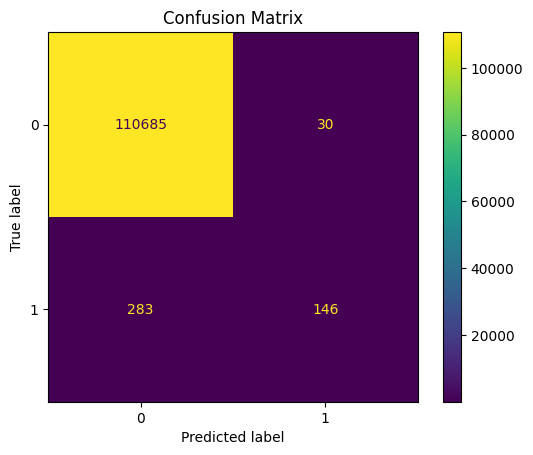


Top 10 Important Features:
      Feature  Importance
0         amt    0.553964
1    gender_M    0.013986
748     day_6    0.008002
747     day_5    0.006805
743     day_1    0.006727
745     day_3    0.006655
746     day_4    0.005745
741  state_WV    0.005170
744     day_2    0.005102
735  state_TX    0.004795


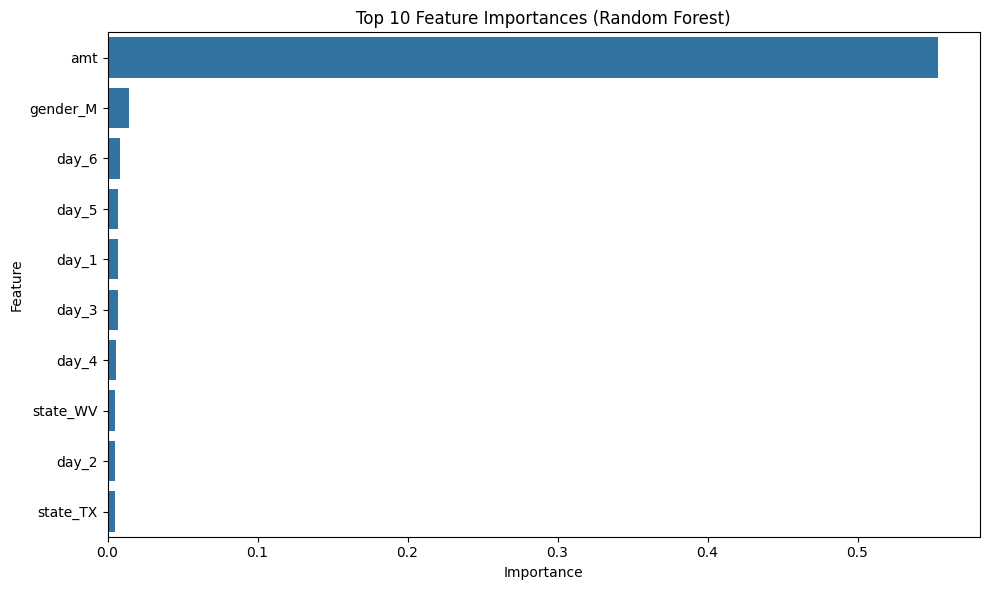

In [8]:
# 📦 Step 0: Imports
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# 🧲 Step 1: Download dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Dataset downloaded to:", path)

# 📁 Step 2: Find and Load CSV
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found!")

df = pd.read_csv(csv_file)
print("Loaded data shape:", df.shape)

# 🧹 Step 3: Feature Engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday
df['hour'] = df['trans_date_trans_time'].dt.hour  # (optional for later use)

# 🎯 Step 4: Define Features and Target
features = ['amt', 'gender', 'merchant', 'state', 'day']
target = 'is_fraud'

X = df[features]
y = df[target]

# 🔣 Step 5: One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['gender', 'merchant', 'state', 'day'], drop_first=True)

# 🧪 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 🌳 Step 7: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 🔍 Step 8: Evaluate Model
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# 🌟 Step 9: Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

# Optional: Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


# XGBoost Classifier

Dataset downloaded to: /kaggle/input/fraud-detection
Loaded data shape: (555719, 23)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.39      0.65      0.49       429

    accuracy                           0.99    111144
   macro avg       0.70      0.82      0.74    111144
weighted avg       1.00      0.99      1.00    111144

ROC AUC Score: 0.9703


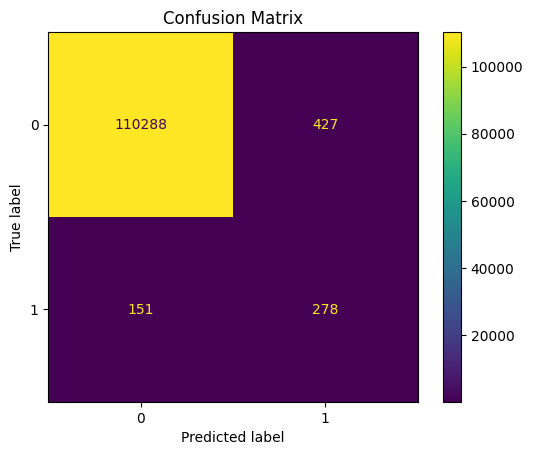

<Figure size 1000x600 with 0 Axes>

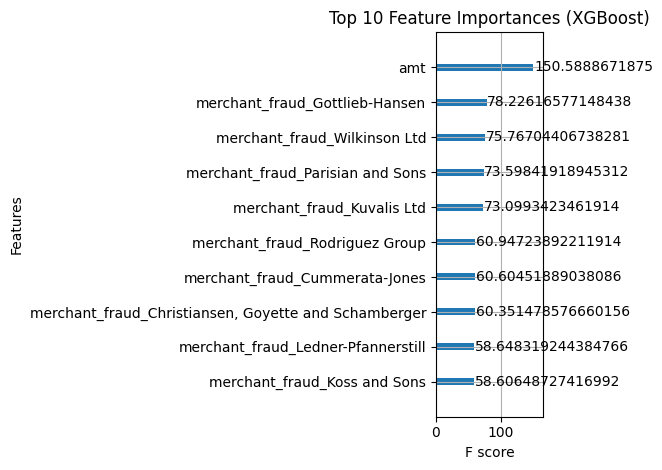

In [9]:
# 📦 Step 0: Install and Imports
!pip install -q xgboost kagglehub

import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance

# 🧲 Step 1: Download dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Dataset downloaded to:", path)

# 📁 Step 2: Find and Load CSV
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found!")

df = pd.read_csv(csv_file)
print("Loaded data shape:", df.shape)

# 🧹 Step 3: Feature Engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['hour'] = df['trans_date_trans_time'].dt.hour  # optional

# 🎯 Step 4: Define Features and Target
features = ['amt', 'gender', 'merchant', 'state', 'day']
target = 'is_fraud'

X = df[features]
y = df[target]

# 🔣 Step 5: One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['gender', 'merchant', 'state', 'day'], drop_first=True)

# 🧪 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 🚀 Step 7: Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=5,  # adjust based on fraud ratio
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 🔍 Step 8: Evaluate Model
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# 🌟 Step 9: Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


# LightGBM

Dataset downloaded to: /kaggle/input/fraud-detection
Loaded data shape: (555719, 23)
[LightGBM] [Info] Number of positive: 1716, number of negative: 442859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1751
[LightGBM] [Info] Number of data points in the train set: 444575, number of used features: 749
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110715
           1       0.06      0.87      0.12       429

    accuracy                           0.95    111144
   macro avg       0.53      0.91      0.55    111144
weighted avg       1.00      0.95      0.97    111144

ROC A

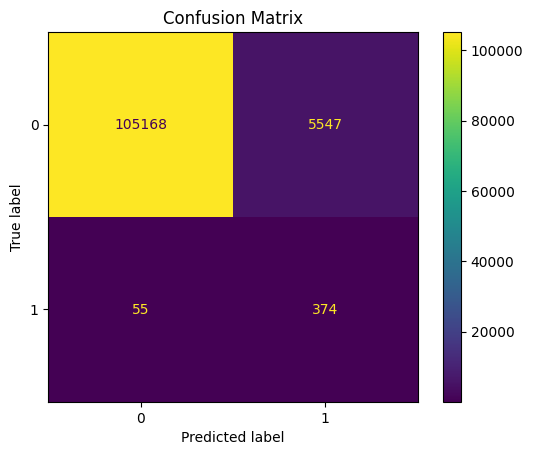


Top 10 Important Features:
                                        Feature  Importance
0                                           amt         613
1                                      gender_M          64
741                                    state_WV          34
743                                       day_1          28
718                                    state_MT          24
746                                       day_4          24
17   merchant_fraud_Bahringer_Osinski_and_Block          23
118              merchant_fraud_Cummerata_Jones          22
745                                       day_3          21
727                                    state_OH          21


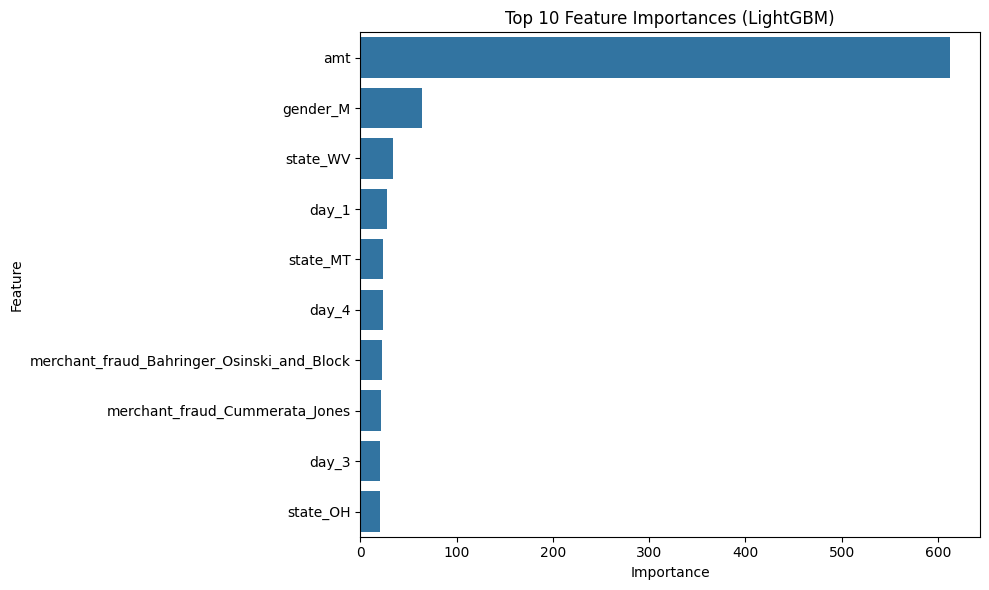

In [11]:
# 📦 Step 0: Install and Import
!pip install -q lightgbm kagglehub

import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import lightgbm as lgb

# 🧲 Step 1: Download dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Dataset downloaded to:", path)

# 📁 Step 2: Find and Load CSV
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found!")

df = pd.read_csv(csv_file)
print("Loaded data shape:", df.shape)

# 🧹 Step 3: Feature Engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['hour'] = df['trans_date_trans_time'].dt.hour

# 🎯 Step 4: Define Features and Target
features = ['amt', 'gender', 'merchant', 'state', 'day']
target = 'is_fraud'

X = df[features]
y = df[target]

# 🔣 Step 5: One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['gender', 'merchant', 'state', 'day'], drop_first=True)

# 🧼 Fix for LightGBM's feature name issue
X_encoded.columns = X_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


# 🧪 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 🌱 Step 7: Train LightGBM Model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handle imbalance
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 🔍 Step 8: Evaluate Model
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# 🌟 Step 9: Feature Importance
importances = lgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

# Optional: Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()


# Observation

| Model               | Accuracy | Precision (Fraud) | Recall (Fraud) | F1 (Fraud) | ROC AUC | Comments |
|---------------------|----------|-------------------|----------------|------------|---------|----------|
| **Logistic Regression** | 87%      | 0.02              | 0.78           | 0.05       | 0.8916  | Good recall, terrible precision — lots of false positives. |
| **Random Forest**       | 100%     | 0.83              | 0.34           | 0.48       | 0.9167  | Excellent precision, but low recall — missed many frauds. |
| **XGBoost**             | 99%      | 0.39              | 0.65           | 0.49       | 0.9703  | Balanced fraud detection performance. |
| **LightGBM**            | 95%      | 0.06              | **0.87**       | 0.12       | **0.9714**  | Best recall, great for catching almost all frauds. |

# Conclusion
If you want to catch nearly all frauds, even at the cost of some false alarms, LightGBM is the best choice (highest recall & ROC AUC).

If you need a balance between catching frauds and avoiding false positives, XGBoost is ideal.

Random Forest is useful for high-confidence detection (fewer false positives), but it misses many fraud cases.

Logistic Regression, while simple and interpretable, is not suitable alone for such an imbalanced problem.